Operator Average:  Operator
1    121.0
2    120.0
3    121.0
Name: Measurements, dtype: float64 5
Overall Average:  121 5
Batch Average:  Batch
1     118.0
2     119.0
3     120.0
4     122.0
5     121.0
6     123.0
7     122.0
8     120.0
9     121.0
10    122.0
11    122.0
12    119.0
13    120.0
14    121.0
15    117.0
16    122.0
17    122.0
18    120.0
19    119.0
20    121.0
21    119.0
22    123.0
23    121.0
24    120.0
25    120.0
26    121.0
27    118.0
28    121.0
29    122.0
30    120.0
Name: Measurements, dtype: float64 5
SS_operator: 4.00145
SS_batch: 195.86889
SS_total: 137.12226
SS_equipment: 6.543
SS_operatorxbatch: -69.29108
SS_repeatability_w_int: 6.543
SS_repeatability_wo_int: -62.74808
df_operator: 2
df_batch: 29
df_operatorxbatch: 58
df_repeatability_w_int: 90
df_repeatability_wo_int: 148
MS_repeatability_w_int: 0.0727
MS_repeatability_wo_int: -0.42397
MS_operatorxbatch: -1.19467
MS_batch: 6.7541
MS_equipment: 0.0727
MS_operator: 2.00072
F_operator: -1.6747
F_batc

C:\Users\ChrisSaid\AppData\Local\Temp\ipykernel_10104\2842079759.py:328: RuntimeWarning: invalid value encountered in scalar power
  SD_totalGRR_wo_int = variance_totalGRR_wo_int ** 0.5
C:\Users\ChrisSaid\AppData\Local\Temp\ipykernel_10104\2842079759.py:329: RuntimeWarning: invalid value encountered in scalar power
  SD_repeatability_wo_int = sigma2_wo_int ** 0.5
C:\Users\ChrisSaid\AppData\Local\Temp\ipykernel_10104\2842079759.py:332: RuntimeWarning: invalid value encountered in scalar power
  SD_total_wo_int = var_tot_wo_int ** 0.5


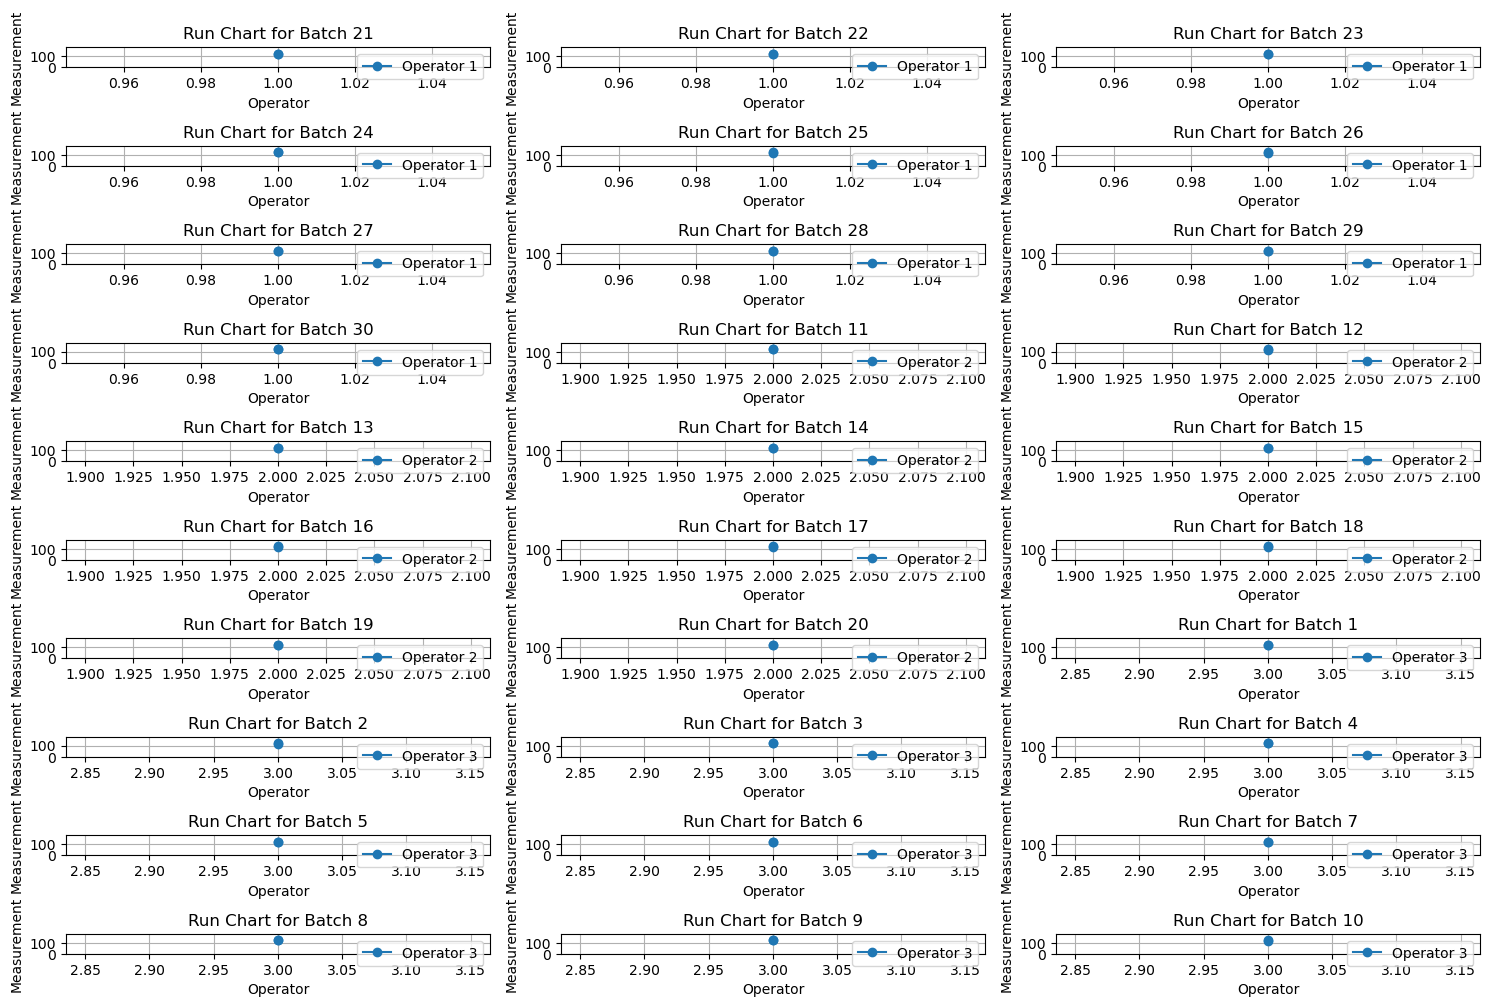

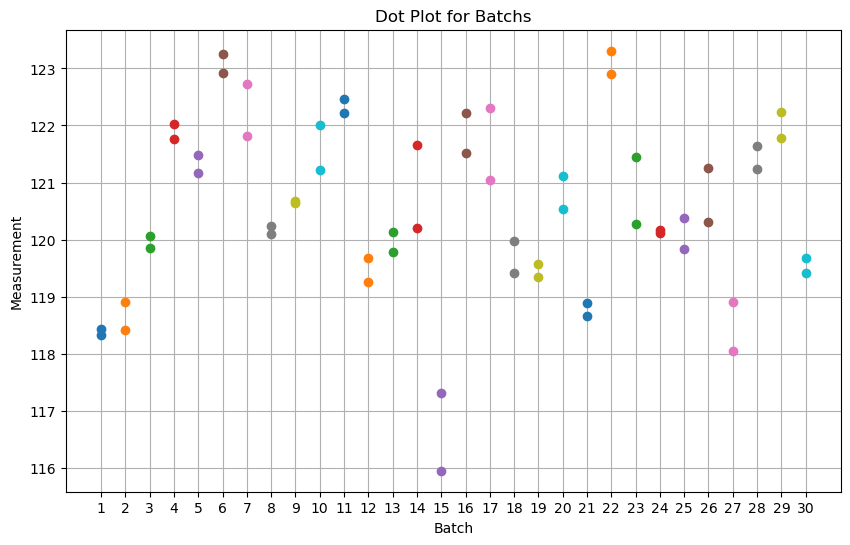

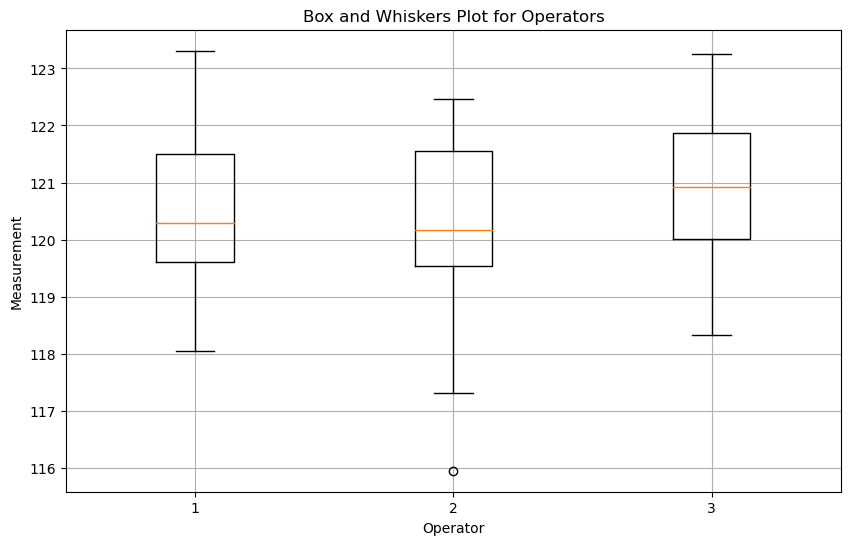

P-value: operator x batch 1.1102230246251565e-16
P-value for operator x batch is 1.1102230246251565e-16 which is less than threshold 0.05 
Operator x Batch interaction is statistically significant
With Interaction:
+--------------------------+---------+
|         Sigma^2          |  Value  |
+--------------------------+---------+
|  Sigma^2 Repeatability   | 0.0727  |
| Sigma^2 Operator x Batch |    0    |
|      Sigma^2 Batch       | 0.08832 |
|     Sigma^2 Operator     | 0.0355  |
+--------------------------+---------+
With Interaction:
+------------------------------+----------+-------------------------+-------------------------+-------------+------------------+
|            Source            | Variance | % Contribution Variance | Standard Deviation (SD) | SV (6 * SD) | % Study Variance |
+------------------------------+----------+-------------------------+-------------------------+-------------+------------------+
|        Total Gage R&R        |  0.1082  |         55.0591         

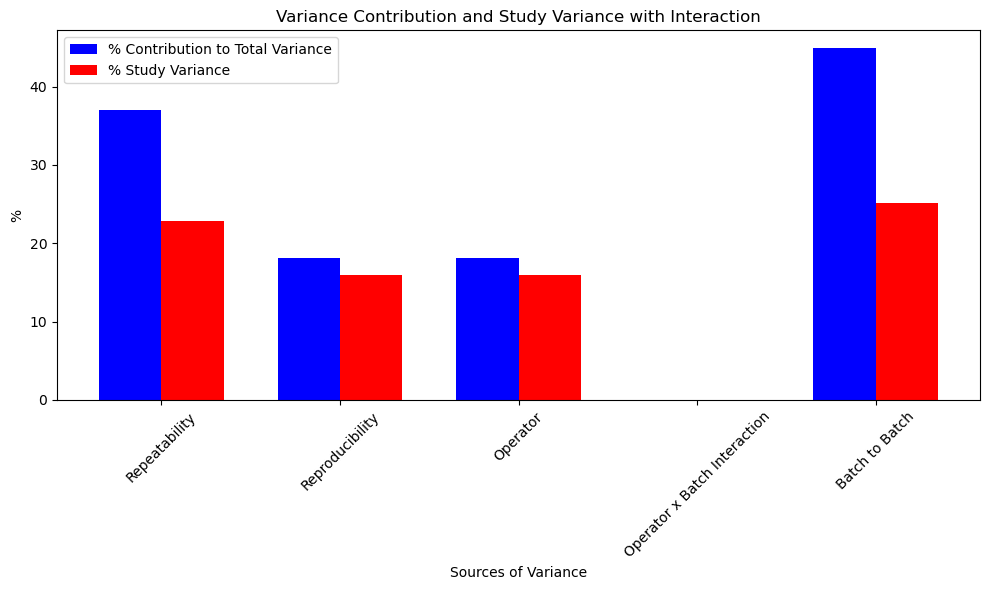

In [2]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
import pandas as pd
from tabulate import tabulate
from scipy.stats import f
import matplotlib.pyplot as plt
import numpy as np
import math

class GaugeRRApp:
    def __init__(self, master):
        # Initialize the GaugeRRApp class with a master widget (typically the main application window)
        self.master = master
        # Set the title of the master window
        self.master.title("Gauge R&R Analysis")
        
        # Call the method to create GUI widgets
        self.create_widgets()
    
    def create_widgets(self):
        # Create and place GUI widgets
        
        # Label for file selection
        self.file_label = ttk.Label(self.master, text="Select Excel File:")
        self.file_label.grid(row=0, column=0, padx=10, pady=5, sticky="w")
        
        # Entry widget for file path
        self.file_entry = ttk.Entry(self.master, width=40)
        self.file_entry.grid(row=0, column=1, padx=10, pady=5, sticky="w")
        
        # Button to browse for a file
        self.browse_button = ttk.Button(self.master, text="Browse", command=self.browse_file)
        self.browse_button.grid(row=0, column=2, padx=10, pady=5, sticky="w")
        
        # Label for selecting operator column
        self.operator_label = ttk.Label(self.master, text="Operator Column:")
        self.operator_label.grid(row=1, column=0, padx=10, pady=5, sticky="w")
        
        # Dropdown menu for selecting operator column
        self.operator_var = tk.StringVar(self.master)
        self.operator_dropdown = ttk.Combobox(self.master, textvariable=self.operator_var, width=20)
        self.operator_dropdown.grid(row=1, column=1, padx=10, pady=5, sticky="w")
        
        # Label for selecting batch column
        self.batch_label = ttk.Label(self.master, text="Batch Column:")
        self.batch_label.grid(row=2, column=0, padx=10, pady=5, sticky="w")
        
        # Dropdown menu for selecting batch column
        self.batch_var = tk.StringVar(self.master)
        self.batch_dropdown = ttk.Combobox(self.master, textvariable=self.batch_var, width=20)
        self.batch_dropdown.grid(row=2, column=1, padx=10, pady=5, sticky="w")
        
        
        # Label for selecting measurement column
        self.measurement_label = ttk.Label(self.master, text="Measurement Column:")
        self.measurement_label.grid(row=4, column=0, padx=10, pady=5, sticky="w")
        
        # Dropdown menu for selecting measurement column
        self.measurement_var = tk.StringVar(self.master)
        self.measurement_dropdown = ttk.Combobox(self.master, textvariable=self.measurement_var, width=20)
        self.measurement_dropdown.grid(row=4, column=1, padx=10, pady=5, sticky="w")
       
        # Button to run the analysis
        self.run_button = ttk.Button(self.master, text="Run Analysis", command=self.run_analysis)
        self.run_button.grid(row=6, column=0, columnspan=3, padx=10, pady=10, sticky="we")
        
        
    def browse_file(self):
        # Open a file dialog to select an Excel file
        file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx;*.xls")])
        # If a file is selected
        if file_path:
            # Clear any previous entry and insert the selected file path
            self.file_entry.delete(0, tk.END)
            self.file_entry.insert(0, file_path)
            # Call the method to load Excel columns
            self.load_excel_columns(file_path)
    
    def load_excel_columns(self, file_path):
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path)
        # Get the list of column names
        columns = df.columns.tolist()
        # Populate the dropdown menus with the column names
        self.operator_dropdown['values'] = columns
        self.batch_dropdown['values'] = columns
        self.measurement_dropdown['values'] = columns
   
    def run_analysis(self):
        # Get the file path from the entry widget
        file_path = self.file_entry.get()
        
        # Check if a file path is provided
        if not file_path:
            print("Error: Please select an Excel file.")
            return
        
        try:
            # Read the Excel file into a DataFrame
            df = pd.read_excel(file_path)
            # Get selected column names from dropdown menus
            operator_column = self.operator_var.get()
            batch_column = self.batch_var.get()
            measurement_column = self.measurement_var.get()

            # Check if all required columns are selected
            if not all([operator_column, batch_column, measurement_column]):
                print("Please select all columns.")
                return
            
            # Perform ANOVA
            results = self.perform_nested_anova(df, operator_column, batch_column, measurement_column)

            # Plot run charts for each operator
            self.plot_run_charts(df)

            # Plot dot plots for each batch
            self.plot_dot_plots(df)
            
            # Plot box and whiskers for each operator
            self.plot_box_whiskers(df)
            
            # If ANOVA results are available
            if results:
                # Retrieve p-value for Operator x Batch interaction
                p_operatorxbatch = results.get("p_operatorxbatch")

                # Print p-value and decide significance
                print("P-value: operator x batch", p_operatorxbatch)

                # Set threshold for deciding significance
                threshold = 0.05

                if p_operatorxbatch is not None and p_operatorxbatch > threshold:
                    print("P-value for operator x batch is", p_operatorxbatch,
                          "which is greater than threshold", threshold,
                          "\nOperator x Batch interaction is not statistically significant")
                    # Print tables for "without Interaction"
                    self.print_wo_int(results)
                else:
                    print("P-value for operator x batch is", p_operatorxbatch,
                          "which is less than threshold", threshold,
                          "\nOperator x Batch interaction is statistically significant")
                    # Print tables for "with Interaction"
                    self.print_w_int(results)

        except Exception as e:
            print(f"An error occurred: {str(e)}")
   
    def perform_nested_anova(self, df, operator_column, batch_column, measurement_column):
        """
        Perform nested ANOVA (Analysis of Variance) to analyze the variance contributions
        of different factors such as operators, batchs, and their interactions in a measurement
        system. The function calculates the sum of squares and mean squares for various sources
        of variance, including operator, batch, operator x batch interaction, and repeatability.

        Args:
            df (DataFrame): The DataFrame containing the data.
            operator_column (str): The name of the column representing operators.
            batch_column (str): The name of the column representing batchs.
            measurement_column (str): The name of the column representing measurements.

        Returns:
            dict or None: A dictionary containing the results of the analysis, including sum
            of squares, mean squares, F-statistics, p-values, and other relevant statistics,
            or None if an error occurs during calculation.
        """
        try:
            # Check if all columns are selected
            if not operator_column or not batch_column or not measurement_column:
                messagebox.showerror("Error", "Please select all columns.")
                return None

            # Calculate the operator sum of squares
            operator_avg = df.groupby(operator_column)[measurement_column].mean()
            overall_avg = df[measurement_column].mean()
            SS_operator = ((operator_avg - overall_avg) ** 2).sum() * len(df[batch_column].unique())

            # Calculate the batchs sum of squares
            batch_avg = df.groupby(batch_column)[measurement_column].mean()
            SS_batch = ((batch_avg - overall_avg) ** 2).sum() * len(df[operator_column].unique())

            # Calculate the total sum of squares
            SS_total = ((df[measurement_column] - overall_avg) ** 2).sum()

            # Compute Equipment within the sum of squares
            SS_equipment = 0
            for batch in df[batch_column].unique():
                for operator in df[operator_column].unique():
                    batch_operator_avg = df[(df[batch_column] == batch) & (df[operator_column] == operator)][measurement_column].mean()
                    squared_deviation = ((df[(df[batch_column] == batch) & (df[operator_column] == operator)][measurement_column] - batch_operator_avg) ** 2).sum()
                    SS_equipment += squared_deviation

            # Find the interaction sum of squares
            SS_operatorxbatch = SS_total - (SS_operator + SS_batch + SS_equipment)

            # Calculate repeatability with and without interaction
            SS_repeatability_w_int = SS_equipment
            SS_repeatability_wo_int = SS_operatorxbatch + SS_repeatability_w_int

            # Evaluate degrees of freedom
            n_operators = len(df[operator_column].unique())
            n_batchs = len(df[batch_column].unique())
            df_operator = n_operators - 1
            df_batch = n_batchs - 1
            df_operatorxbatch = df_operator * df_batch
            df_repeatability_w_int = n_operators * n_batchs
            df_repeatability_wo_int = df_repeatability_w_int + df_operatorxbatch

            # Calculate mean squares
            MS_repeatability_w_int = SS_repeatability_w_int / df_repeatability_w_int
            MS_repeatability_wo_int = SS_repeatability_wo_int / df_repeatability_wo_int
            MS_operatorxbatch = SS_operatorxbatch / df_operatorxbatch
            MS_batch = SS_batch / df_batch
            MS_equipment = SS_equipment / (n_operators * n_batchs)
            MS_operator = SS_operator / df_operator

            # Calculate F-values
            F_operator = MS_operator / MS_operatorxbatch
            F_batch = MS_batch / MS_operatorxbatch
            F_operatorxbatch = MS_operatorxbatch / MS_equipment

            # Calculate p-values
            p_operator = 1 - f.cdf(abs(F_operator), df_operator, df_operatorxbatch)
            p_batch = 1 - f.cdf(abs(F_batch), df_batch, df_operatorxbatch)
            p_operatorxbatch = 1 - f.cdf(abs(F_operatorxbatch), df_operatorxbatch, df_repeatability_w_int)

            
            # Diagnostic prints, uncomment as needed. 
             # Print ANOVA results
            print("Operator Average: ", round(operator_avg), 5)
            print("Overall Average: ", round(overall_avg), 5)
            print("Batch Average: ", round(batch_avg), 5)
            print("SS_operator:", round(SS_operator, 5))
            print("SS_batch:", round(SS_batch, 5))
            print("SS_total:", round(SS_total, 5))
            print("SS_equipment:", round(SS_equipment, 5))
            print("SS_operatorxbatch:", round(SS_operatorxbatch, 5))
            print("SS_repeatability_w_int:", round(SS_repeatability_w_int, 5))
            print("SS_repeatability_wo_int:", round(SS_repeatability_wo_int, 5))

            print("df_operator:", round(df_operator, 5))
            print("df_batch:", round(df_batch, 5))
            print("df_operatorxbatch:", round(df_operatorxbatch, 5))
            print("df_repeatability_w_int:", round(df_repeatability_w_int, 5))
            print("df_repeatability_wo_int:", round(df_repeatability_wo_int, 5))

            print("MS_repeatability_w_int:", round(MS_repeatability_w_int, 5))
            print("MS_repeatability_wo_int:", round(MS_repeatability_wo_int, 5))
            print("MS_operatorxbatch:", round(MS_operatorxbatch, 5))
            print("MS_batch:", round(MS_batch, 5))
            print("MS_equipment:", round(MS_equipment, 5))
            print("MS_operator:", round(MS_operator, 5))

            print("F_operator:", round(F_operator, 5))
            print("F_batch:", round(F_batch, 5))
            print("F_operatorxbatch:", round(F_operatorxbatch, 5))

            print("p_operator:", round(p_operator, 5))
            print("p_batch:", round(p_batch, 5))
            print("p_operatorxbatch:", round(p_operatorxbatch, 5))
            
            # Create and print ANOVA table
            table_data = [
                ["Operator", round(df_operator, 5), round(SS_operator, 5), round(MS_operator, 5), round(F_operator, 5), round(p_operator, 5)],
                ["Batch", round(df_batch, 5), round(SS_batch, 5), round(MS_batch, 5), round(F_batch, 5), round(p_batch, 5)],
                ["Interaction (Operator x Batch)", round(df_operatorxbatch, 5), round(SS_operatorxbatch, 5), round(MS_operatorxbatch, 5), round(F_operatorxbatch, 5), round(p_operatorxbatch, 5)],
                ["Repeatability (with Interaction)", round(df_repeatability_w_int, 5), round(SS_repeatability_w_int, 5), round(MS_repeatability_w_int, 5), ""],
                ["Repeatability (without Interaction)", round(df_repeatability_wo_int, 5), round(SS_repeatability_wo_int, 5), round(MS_repeatability_wo_int, 5), ""]
            ]

            headers = ["Source", "DF", "Sum of Square", "Mean Square", "F", "p-value"]
            print(tabulate(table_data, headers=headers, tablefmt="pretty"))

            # Calculate additional statistics for both with and without interaction
            sigma2_wo_int = MS_repeatability_wo_int
            sigma2_w_int = MS_repeatability_w_int
            sigma2_operatorxbatch_wo_int = max((MS_operatorxbatch - sigma2_wo_int), 0)
            sigma2_operatorxbatch_w_int = max((MS_operatorxbatch - sigma2_w_int), 0)
            sigma2_batch = (MS_batch - MS_operatorxbatch) / (n_operators * n_batchs)
            sigma2_operator = (MS_operator - MS_operatorxbatch) / (n_operators * n_batchs)
            sigma2_reproducibility_w_int = sigma2_operator + sigma2_operatorxbatch_w_int
            sigma2_reproducibility_wo_int = sigma2_operator + sigma2_operatorxbatch_wo_int

            # General variables
            SD_operator = sigma2_operator ** 0.5
            SD_p2p = sigma2_batch ** 0.5
            SV_operator = SD_operator * 6
            SV_p2p = SD_p2p * 6

            # Variables related to with interaction
            variance_totalGRR_w_int = sigma2_w_int + sigma2_reproducibility_w_int
            variance_reproducibility_w_int = sigma2_operator + sigma2_operatorxbatch_w_int
            var_tot_w_int = sigma2_w_int + sigma2_operator + sigma2_operatorxbatch_w_int + sigma2_batch
            pct_var_contb_totalGRR_w_int = (variance_totalGRR_w_int / var_tot_w_int) * 100
            pct_var_contb_repeatability_w_int = (sigma2_w_int / var_tot_w_int) * 100
            pct_var_contb_reproducibility_w_int = (variance_reproducibility_w_int / var_tot_w_int) * 100
            pct_var_contb_operator_w_int = (sigma2_operator / var_tot_w_int) * 100
            pct_var_contb_operatorxbatch_w_int = (sigma2_operatorxbatch_w_int / var_tot_w_int) * 100
            pct_var_contb_p2p_w_int = (sigma2_batch / var_tot_w_int) * 100
            SD_totalGRR_w_int = variance_totalGRR_w_int ** 0.5
            SD_repeatability_w_int = sigma2_w_int ** 0.5
            SD_reproducibility_w_int = variance_reproducibility_w_int ** 0.5
            SD_operatorxbatch_w_int = sigma2_operatorxbatch_w_int ** 0.5
            SD_total_w_int = var_tot_w_int * 6
            SV_totalGRR_w_int = SD_totalGRR_w_int * 6
            SV_repeatability_w_int = SD_repeatability_w_int * 6
            SV_reproducibility_w_int = SD_reproducibility_w_int * 6
            SV_operatorxbatch_w_int = SD_operatorxbatch_w_int * 6
            SV_total_w_int = SD_total_w_int * 6
            pct_SV_totalGRR_w_int = (SD_totalGRR_w_int / SD_total_w_int) * 100
            pct_SV_repeatability_w_int = (SD_repeatability_w_int / SD_total_w_int) * 100
            pct_SV_reproducibility_w_int = (SD_reproducibility_w_int / SD_total_w_int) * 100
            pct_SV_operator_w_int = (SD_operator / SD_total_w_int) * 100
            pct_SV_operatorxbatch_w_int = (SD_operatorxbatch_w_int / SD_total_w_int) * 100
            pct_SV_p2p_w_int = (SD_p2p / SD_total_w_int) * 100

            # Variables related to without interaction
            variance_totalGRR_wo_int = sigma2_wo_int + sigma2_reproducibility_wo_int
            variance_reproducibility_wo_int = sigma2_operator + sigma2_operatorxbatch_wo_int
            var_tot_wo_int = sigma2_wo_int + sigma2_operator + sigma2_operatorxbatch_wo_int + sigma2_batch
            pct_var_contb_totalGRR_wo_int = (variance_totalGRR_wo_int / var_tot_wo_int) * 100
            pct_var_contb_repeatability_wo_int = (sigma2_wo_int / var_tot_wo_int) * 100
            pct_var_contb_reproducibility_wo_int = (variance_reproducibility_wo_int / var_tot_wo_int) * 100
            pct_var_contb_operator_wo_int = (sigma2_operator / var_tot_wo_int) * 100
            pct_var_contb_operatorxbatch_wo_int = (sigma2_operatorxbatch_wo_int / var_tot_wo_int) * 100
            pct_var_contb_p2p_wo_int = (sigma2_batch / var_tot_wo_int) * 100
            SD_totalGRR_wo_int = variance_totalGRR_wo_int ** 0.5
            SD_repeatability_wo_int = sigma2_wo_int ** 0.5
            SD_reproducibility_wo_int = variance_reproducibility_wo_int ** 0.5
            SD_operatorxbatch_wo_int = sigma2_operatorxbatch_wo_int ** 0.5
            SD_total_wo_int = var_tot_wo_int ** 0.5
            SV_totalGRR_wo_int = SD_totalGRR_wo_int * 6
            SV_repeatability_wo_int = SD_repeatability_wo_int * 6
            SV_reproducibility_wo_int = SD_reproducibility_wo_int * 6
            SV_operatorxbatch_wo_int = SD_operatorxbatch_wo_int * 6
            SV_total_wo_int = SD_total_wo_int * 6
            pct_SV_totalGRR_wo_int = (SD_totalGRR_wo_int / SD_total_wo_int) * 100
            pct_SV_repeatability_wo_int = (SD_repeatability_wo_int / SD_total_wo_int) * 100
            pct_SV_reproducibility_wo_int = (SD_reproducibility_wo_int / SD_total_wo_int) * 100
            pct_SV_operator_wo_int = (SD_operator / SD_total_wo_int) * 100
            pct_SV_operatorxbatch_wo_int = (SD_operatorxbatch_wo_int / SD_total_wo_int) * 100
            pct_SV_p2p_wo_int = (SD_p2p / SD_total_wo_int) * 100

            # Return ANOVA results
            return {
                # General variables
                "SD_operator": SD_operator,
                "SD_p2p": SD_p2p,
                "p_operatorxbatch": p_operatorxbatch,
                "SV_operator": SV_operator,
                "SV_p2p": SV_p2p,

                #variables for with interaction
                "sigma2_w_int": sigma2_w_int,
                "sigma2_operatorxbatch_w_int": sigma2_operatorxbatch_w_int,
                "sigma2_batch": sigma2_batch,
                "sigma2_operator": sigma2_operator,
                "variance_totalGRR_w_int": variance_totalGRR_w_int,
                "variance_reproducibility_w_int": variance_reproducibility_w_int,
                "var_tot_w_int": var_tot_w_int,
                "pct_var_contb_totalGRR_w_int": pct_var_contb_totalGRR_w_int,
                "pct_var_contb_repeatability_w_int": pct_var_contb_repeatability_w_int,
                "pct_var_contb_reproducibility_w_int": pct_var_contb_reproducibility_w_int,
                "pct_var_contb_operator_w_int": pct_var_contb_operator_w_int,
                "pct_var_contb_operatorxbatch_w_int": pct_var_contb_operatorxbatch_w_int,
                "pct_var_contb_p2p_w_int": pct_var_contb_p2p_w_int,
                "SD_totalGRR_w_int": SD_totalGRR_w_int,
                "SD_repeatability_w_int": SD_repeatability_w_int,
                "SD_reproducibility_w_int": SD_reproducibility_w_int,
                "SD_operatorxbatch_w_int": SD_operatorxbatch_w_int,
                "SD_total_w_int": SD_total_w_int,
                "SV_totalGRR_w_int": SV_totalGRR_w_int,
                "SV_repeatability_w_int": SV_repeatability_w_int,
                "SV_reproducibility_w_int": SV_reproducibility_w_int,
                "SV_operatorxbatch_w_int": SV_operatorxbatch_w_int, 
                "SV_total_w_int": SV_total_w_int,
                "pct_SV_totalGRR_w_int": pct_SV_totalGRR_w_int,
                "pct_SV_repeatability_w_int": pct_SV_repeatability_w_int,
                "pct_SV_reproducibility_w_int": pct_SV_reproducibility_w_int,
                "pct_SV_operator_w_int": pct_SV_operator_w_int,
                "pct_SV_operatorxbatch_w_int": pct_SV_operatorxbatch_w_int,
                "pct_SV_p2p_w_int": pct_SV_p2p_w_int,
                
                # Variables for without interaction
                "sigma2_wo_int": sigma2_wo_int,
                "sigma2_operatorxbatch_wo_int": sigma2_operatorxbatch_wo_int,
                "sigma2_batch": sigma2_batch,
                "sigma2_operator": sigma2_operator,
                "variance_totalGRR_wo_int": variance_totalGRR_wo_int,
                "variance_reproducibility_wo_int": variance_reproducibility_wo_int,
                "var_tot_wo_int": var_tot_wo_int,
                "pct_var_contb_totalGRR_wo_int": pct_var_contb_totalGRR_wo_int,
                "pct_var_contb_repeatability_wo_int": pct_var_contb_repeatability_wo_int,
                "pct_var_contb_reproducibility_wo_int": pct_var_contb_reproducibility_wo_int,
                "pct_var_contb_operator_wo_int": pct_var_contb_operator_wo_int,
                "pct_var_contb_operatorxbatch_wo_int": pct_var_contb_operatorxbatch_wo_int,
                "pct_var_contb_p2p_wo_int": pct_var_contb_p2p_wo_int,
                "SD_totalGRR_wo_int": SD_totalGRR_wo_int,
                "SD_repeatability_wo_int": SD_repeatability_wo_int,
                "SD_reproducibility_wo_int": SD_reproducibility_wo_int,
                "SD_operatorxbatch_wo_int": SD_operatorxbatch_wo_int,
                "SD_total_wo_int": SD_total_wo_int,
                "SV_totalGRR_wo_int": SV_totalGRR_wo_int,
                "SV_repeatability_wo_int": SV_repeatability_wo_int,
                "SV_reproducibility_wo_int": SV_reproducibility_wo_int,
                "SV_operatorxbatch_wo_int": SV_operatorxbatch_wo_int,
                "SV_total_wo_int": SV_total_wo_int,
                "pct_SV_totalGRR_wo_int": pct_SV_totalGRR_wo_int,
                "pct_SV_repeatability_wo_int": pct_SV_repeatability_wo_int,
                "pct_SV_reproducibility_wo_int": pct_SV_reproducibility_wo_int,
                "pct_SV_operator_wo_int": pct_SV_operator_wo_int,
                "pct_SV_operatorxbatch_wo_int": pct_SV_operatorxbatch_wo_int,
                "pct_SV_p2p_wo_int": pct_SV_p2p_wo_int             
                
            }
        except Exception as e:
            print("Error", f"An error occured during ANOVA calculation: {str(e)}")
            return None

    def plot_variance_contributions_w_int(self, results):
        """
        Plot variance contributions with interaction.

        Args:
            results (dict): A dictionary containing the results of the analysis.

        Returns:
            None
        """
        # Define labels and sizes for the plot
        labels = ['Repeatability', 'Reproducibility', 'Operator', 'Operator x Batch Interaction', 'Batch to Batch']
        sizes = [results["pct_var_contb_repeatability_w_int"], 
                results["pct_var_contb_reproducibility_w_int"], 
                results["pct_var_contb_operator_w_int"], 
                results["pct_var_contb_operatorxbatch_w_int"], 
                results["pct_var_contb_p2p_w_int"]]
        study_variance = [results["pct_SV_repeatability_w_int"],
                        results["pct_SV_reproducibility_w_int"],
                        results["pct_SV_operator_w_int"],
                        results["pct_SV_operatorxbatch_w_int"],
                        results["pct_SV_p2p_w_int"]]
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']

        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars

        # Create subplots
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Plot bars for contribution to total variance
        rects1 = ax.bar(x - width/2, sizes, width, label='% Contribution to Total Variance', color='b')
        
        # Plot bars for study variance
        rects2 = ax.bar(x + width/2, study_variance, width, label='% Study Variance', color='r')

        # Add labels, title, and legend
        ax.set_xlabel('Sources of Variance')
        ax.set_ylabel('%')
        ax.set_title('Variance Contribution and Study Variance with Interaction')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=45)
        ax.legend()

        # Adjust layout and display plot
        fig.tight_layout()
        plt.show()

    
    def plot_variance_contributions_wo_int(self, results):
        """
        Plot variance contributions without interaction.

        Args:
            results (dict): A dictionary containing the results of the analysis.

        Returns:
            None
        """
        # Define labels and sizes for the plot
        labels = ['Repeatability', 'Reproducibility', 'Operator', 'Batch to Batch']
        sizes = [results["pct_var_contb_repeatability_wo_int"], 
                results["pct_var_contb_reproducibility_wo_int"], 
                results["pct_var_contb_operator_wo_int"], 
                results["pct_var_contb_p2p_wo_int"]]
        study_variance = [results["pct_SV_repeatability_wo_int"],
                        results["pct_SV_reproducibility_wo_int"],
                        results["pct_SV_operator_wo_int"],
                        results["pct_SV_p2p_wo_int"]]

        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars

        # Create subplots
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Plot bars for contribution to total variance
        rects1 = ax.bar(x - width/2, sizes, width, label='% Contribution to Total Variance', color='b')
        
        # Plot bars for study variance
        rects2 = ax.bar(x + width/2, study_variance, width, label='% Study Variance', color='r')

        # Add labels, title, and legend
        ax.set_xlabel('Sources of Variance')
        ax.set_ylabel('%')
        ax.set_title('Variance Contribution and Study Variance without Interaction')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=45)
        ax.legend()

        # Adjust layout
        fig.tight_layout()
        plt.show()

    def plot_run_charts(self, df):
        """
        Plot run charts for each batch.

        Args:
            df (DataFrame): The DataFrame containing the data.

        Returns:
            None
        """
        batchs = df[self.batch_var.get()].unique()
        measurement_column = self.measurement_var.get()
        num_batchs = len(batchs)
        num_cols = 3  # Adjust the number of columns as needed
        num_rows = math.ceil(num_batchs / num_cols)

        # Create subplots
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

        for idx, batch in enumerate(batchs):
            batch_data = df[df[self.batch_var.get()] == batch]
            operators = batch_data[self.operator_var.get()].unique()
            row = idx // num_cols
            col = idx % num_cols
            ax = axes[row, col] if num_rows > 1 else axes[col]

            ax.set_title(f"Run Chart for Batch {batch}")
            ax.set_xlabel("Operator")
            ax.set_ylabel("Measurement")
            ax.grid(True)

            for operator in operators:
                operator_data = batch_data[batch_data[self.operator_var.get()] == operator]
                x = [operator] * len(operator_data)  # Set x as operator for each measurement
                y = operator_data[measurement_column]

                ax.plot(x, y, marker='o', linestyle='-', label=f"Operator {operator}")

            ax.legend()
            ax.set_ylim(0, ax.get_ylim()[1] * 1.5)  # Increase y-axis scale by 50%

        # Hide empty subplots
        for i in range(len(batchs), num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            axes[row, col].axis('off')

        # Adjust layout and display plot
        plt.tight_layout()
        plt.show()


    def plot_dot_plots(self, df):
        """
        Plot dot plots for each batch.

        Args:
            df (DataFrame): The DataFrame containing the data.

        Returns:
            None
        """
        batchs = df[self.batch_var.get()].unique()
        measurement_column = self.measurement_var.get()

        plt.figure(figsize=(10, 6))

        for batch in batchs:
            batch_data = df[df[self.batch_var.get()] == batch]
            y = batch_data[measurement_column]
            x = [batch] * len(y)

            plt.plot(x, y, marker='o', linestyle='', label=f"Batch {batch}")

        plt.title("Dot Plot for Batchs")
        plt.xlabel("Batch")
        plt.ylabel("Measurement")
        plt.xticks(batchs)
        plt.grid(True)
        plt.show()

    
    def plot_box_whiskers(self, df):
        """
        Plot box and whisker plots for each operator.

        Args:
            df (DataFrame): The DataFrame containing the data.

        Returns:
            None
        """
        operators = sorted(df[self.operator_var.get()].unique())
        measurement_column = self.measurement_var.get()

        plt.figure(figsize=(10, 6))

        box_data = []
        for operator in operators:
            operator_data = df[df[self.operator_var.get()] == operator][measurement_column]
            box_data.append(operator_data)

        plt.boxplot(box_data, labels=operators)
        plt.title("Box and Whiskers Plot for Operators")
        plt.xlabel("Operator")
        plt.ylabel("Measurement")
        plt.grid(True)
        plt.show()

  
    def print_w_int(self, results):
        # Check if all necessary keys exist in the results dictionary
        necessary_keys = [
            "sigma2_w_int",
            "sigma2_operatorxbatch_w_int",
            "sigma2_batch",
            "sigma2_operator",
            "variance_totalGRR_w_int",
            "pct_var_contb_totalGRR_w_int",
            "SD_totalGRR_w_int",
            "pct_SV_totalGRR_w_int",
            "pct_var_contb_repeatability_w_int",
            "SD_repeatability_w_int",
            "pct_SV_repeatability_w_int",
            "variance_reproducibility_w_int",
            "pct_var_contb_reproducibility_w_int",
            "SD_reproducibility_w_int",
            "pct_SV_reproducibility_w_int",
            "sigma2_operator",
            "pct_var_contb_operator_w_int",
            "SD_operator",
            "pct_SV_operator_w_int",
            "sigma2_operatorxbatch_w_int",
            "pct_var_contb_operatorxbatch_w_int",
            "SD_operatorxbatch_w_int",
            "pct_SV_operatorxbatch_w_int",
            "sigma2_batch",
            "pct_var_contb_p2p_w_int",
            "SD_p2p",
            "pct_SV_p2p_w_int",
            "var_tot_w_int", 
            "SV_totalGRR_w_int",
            "SV_repeatability_w_int" ,
            "SV_reproducibility_w_int",
            "SV_operatorxbatch_w_int", 
            "SV_total_w_int",
            "SV_operator",
            "SV_p2p"
        ]

        for key in necessary_keys:
            if key not in results:
                print(f"Error: Key '{key}' is missing in the results dictionary.")
                return

        table_data_w_int = [
            ["Sigma^2 Repeatability", round(results["sigma2_w_int"], 5)],
            ["Sigma^2 Operator x Batch", round(results["sigma2_operatorxbatch_w_int"], 5)],
            ["Sigma^2 Batch", round(results["sigma2_batch"], 5)],
            ["Sigma^2 Operator", round(results["sigma2_operator"], 5)]
        ]


        headers = ["Sigma^2", "Value"]

        print("With Interaction:")
        print(tabulate(table_data_w_int, headers=headers, tablefmt="pretty"))

        # Data for "with Interaction"
        table_data_with_int = [
            ["Total Gage R&R", round(results["variance_totalGRR_w_int"], 5), round(results["pct_var_contb_totalGRR_w_int"], 5), round(results["SD_totalGRR_w_int"], 5), round(results["SV_totalGRR_w_int"], 5), round(results["pct_SV_totalGRR_w_int"], 5)],
            ["Repeatability", round(results["sigma2_w_int"], 5), round(results["pct_var_contb_repeatability_w_int"], 5), round(results["SD_repeatability_w_int"], 5), round(results["SV_repeatability_w_int"], 5), round(results["pct_SV_repeatability_w_int"], 5)],
            ["Reproducibility", round(results["variance_reproducibility_w_int"], 5), round(results["pct_var_contb_reproducibility_w_int"], 5), round(results["SD_reproducibility_w_int"], 5), round(results["SV_reproducibility_w_int"], 5), round(results["pct_SV_reproducibility_w_int"], 5)],
            ["Operator", round(results["sigma2_operator"], 5), round(results["pct_var_contb_operator_w_int"], 5), round(results["SD_operator"], 5), round(results["SV_operator"], 5), round(results["pct_SV_operator_w_int"], 5)],
            ["Operator x Batch Interaction", round(results["sigma2_operatorxbatch_w_int"], 5), round(results["pct_var_contb_operatorxbatch_w_int"], 5), round(results["SD_operatorxbatch_w_int"], 5), round(results["SV_operatorxbatch_w_int"], 5), round(results["pct_SV_operatorxbatch_w_int"], 5)],
            ["Batch to Batch", round(results["sigma2_batch"], 5), round(results["pct_var_contb_p2p_w_int"], 5), round(results["SD_p2p"], 5), round(results["SV_p2p"], 5), round(results["pct_SV_p2p_w_int"], 5)],
            ["Total Variation", round(results["var_tot_w_int"], 5)]
        ]


        headers = ["Source", "Variance", "% Contribution Variance", "Standard Deviation (SD)", "SV (6 * SD)", "% Study Variance"]

        print("With Interaction:")
        print(tabulate(table_data_with_int, headers=headers, tablefmt="pretty"))

        # Plot variance contributions with interaction
        self.plot_variance_contributions_w_int(results)


    def print_wo_int(self, results):
        # Check if all necessary keys exist in the results dictionary
        necessary_keys = [
            "sigma2_wo_int",
            "sigma2_operatorxbatch_wo_int",
            "sigma2_batch",
            "sigma2_operator",
            "variance_totalGRR_wo_int",
            "pct_var_contb_totalGRR_wo_int",
            "SD_totalGRR_wo_int",
            "pct_SV_totalGRR_wo_int",
            "pct_var_contb_repeatability_wo_int",
            "SD_repeatability_wo_int",
            "pct_SV_repeatability_wo_int",
            "variance_reproducibility_wo_int",
            "pct_var_contb_reproducibility_wo_int",
            "SD_reproducibility_wo_int",
            "pct_SV_reproducibility_wo_int",
            "sigma2_operator",
            "pct_var_contb_operator_wo_int",
            "SD_operator",
            "pct_SV_operator_wo_int",
            "sigma2_operatorxbatch_wo_int",
            "pct_var_contb_operatorxbatch_wo_int",
            "SD_operatorxbatch_wo_int",
            "pct_SV_operatorxbatch_wo_int",
            "sigma2_batch",
            "pct_var_contb_p2p_wo_int",
            "SD_p2p",
            "pct_SV_p2p_wo_int",
            "var_tot_wo_int",
            "SV_totalGRR_wo_int",
            "SV_repeatability_wo_int" ,
            "SV_reproducibility_wo_int",
            "SV_operatorxbatch_wo_int", 
            "SV_total_wo_int",
            "SV_operator",
            "SV_p2p"
        ]

        for key in necessary_keys:
            if key not in results:
                print(f"Error: Key '{key}' is missing in the results dictionary.")
                return

        table_data_wo_int = [
            ["Sigma^2 Repeatability", round(results["sigma2_wo_int"], 5)],
            ["Sigma^2 Operator x Batch", round(results["sigma2_operatorxbatch_wo_int"], 5)],
            ["Sigma^2 Batch", round(results["sigma2_batch"], 5)],
            ["Sigma^2 Operator", round(results["sigma2_operator"], 5)]
        ]


        headers = ["Sigma^2", "Value"]

        print("Without Interaction:")
        print(tabulate(table_data_wo_int, headers=headers, tablefmt="pretty"))

        # Data for "without Interaction"
        table_data_wo_int = [
            ["Total Gage R&R", round(results["variance_totalGRR_wo_int"], 5), round(results["pct_var_contb_totalGRR_wo_int"], 5), round(results["SD_totalGRR_wo_int"], 5), round(results["SV_totalGRR_wo_int"], 5), round(results["pct_SV_totalGRR_wo_int"], 5)],
            ["Repeatability", round(results["sigma2_wo_int"], 5), round(results["pct_var_contb_repeatability_wo_int"], 5), round(results["SD_repeatability_wo_int"], 5), round(results["SV_repeatability_wo_int"], 5), round(results["pct_SV_repeatability_wo_int"], 5)],
            ["Reproducibility", round(results["variance_reproducibility_wo_int"], 5), round(results["pct_var_contb_reproducibility_wo_int"], 5), round(results["SD_reproducibility_wo_int"], 5), round(results["SV_reproducibility_wo_int"], 5), round(results["pct_SV_reproducibility_wo_int"], 5)],
            ["Operator", round(results["sigma2_operator"], 5), round(results["pct_var_contb_operator_wo_int"], 5), round(results["SD_operator"], 5), round(results["SV_operator"], 5), round(results["pct_SV_operator_wo_int"], 5)],
            ["Operator x Batch Interaction", round(results["sigma2_operatorxbatch_wo_int"], 5), round(results["pct_var_contb_operatorxbatch_wo_int"], 5), round(results["SD_operatorxbatch_wo_int"], 5), round(results["SV_operatorxbatch_wo_int"], 5), round(results["pct_SV_operatorxbatch_wo_int"], 5)],
            ["Batch to Batch", round(results["sigma2_batch"], 5), round(results["pct_var_contb_p2p_wo_int"], 5), round(results["SD_p2p"], 5), round(results["SV_p2p"], 5), round(results["pct_SV_p2p_wo_int"], 5)],
            ["Total Variation", round(results["var_tot_wo_int"], 5)]
        ]



        headers = ["Source", "Variance", "% Contribution Variance", "Standard Deviation (SD)", "SV (6 * SD)", "% Study Variance"]

        print("Without Interaction:")
        print(tabulate(table_data_wo_int, headers=headers, tablefmt="pretty"))

        # Plot variance contributions with interaction
        self.plot_variance_contributions_wo_int(results)


def main():
    root = tk.Tk()
    app = GaugeRRApp(root)
    root.mainloop()

if __name__ == "__main__":
    main()
